### This code is a sample about how to use `yt` and `trident` to analyse the `TNG` data.
-----
created by Shulan Yan at 2021.09.02

**Some useful webpage**

- 1.Yt project : https://yt-project.org/
- 2.Trident project : http://trident-project.org/
- 3.TNG project : https://www.tng-project.org/

**We need install the yt 4.0 and the [development version of trident](https://trident.readthedocs.io/en/latest/installation.html).**

In [1]:
import numpy as np
import pandas as pd
import trident as tri
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, yt

**load the data of `tng100-3`**

In [5]:
ds = yt.load('tng100-3/snapdir_099/snap_099.0.hdf5')

yt : [INFO     ] 2021-09-02 14:11:43,966 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2021-09-02 14:11:44,033 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2021-09-02 14:11:44,034 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-09-02 14:11:44,036 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-09-02 14:11:44,037 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-09-02 14:11:44,038 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-09-02 14:11:44,039 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2021-09-02 14:11:44,040 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-09-02 14:11:44,040 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-09-02 14:11:44,041 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-09-02 14:11:44,041 Parameters: hubble_consta

**extract the data we need**

In [22]:
gas = ds.all_data('gas')

In [23]:
density = gas['density']

In [24]:
## check the density
print('data length of the density: '+ str(len(density)))

data length of the density: 88935326


In [25]:
coord = gas['Coordinates']

/home/yanshulan/.local/lib/python3.6/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'Coordinates' is ambiguous and corresponds to any one of the following field types:
 {'nbody', 'all', 'PartType5', 'PartType0', 'PartType1'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("PartType0", "Coordinates")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)


In [26]:
coord[0]

unyt_array([  870.53536263, 26340.14797967, 18286.47294083], 'code_length')

### Plot the figure

**sliceplot**

In [9]:
slc = yt.SlicePlot(ds,'z',('gas','density'),width=(75.0, "Mpc/h"))

yt : [INFO     ] 2021-09-02 14:14:57,975 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:14:57,976 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:14:57,977 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:14:57,978 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:14:57,979 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


**set the color map**


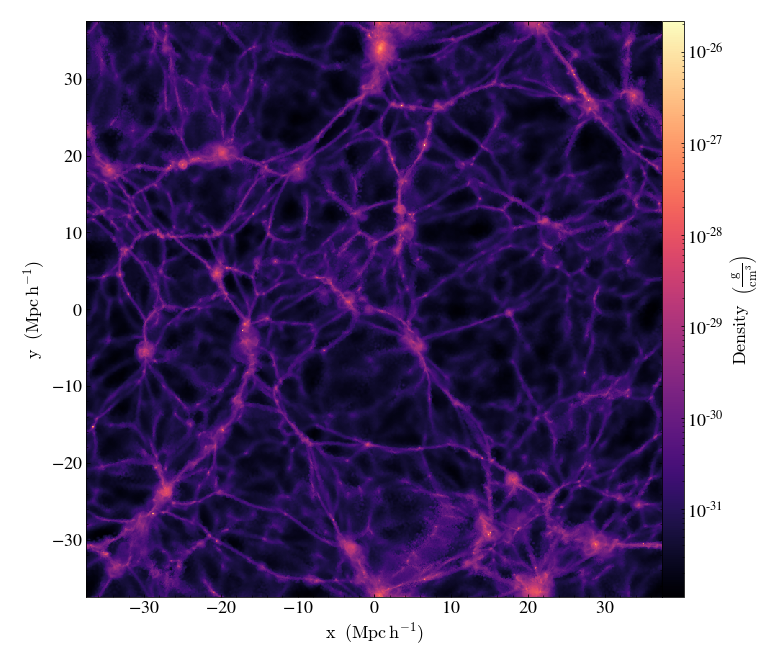

In [10]:
slc.set_cmap(field=("gas", "density"), cmap="magma")


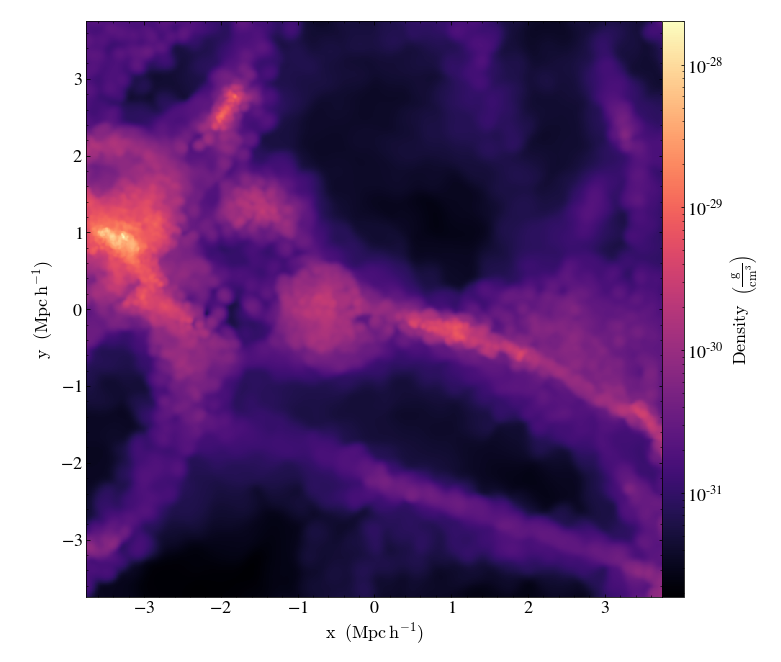

In [11]:
slc.zoom(10)

**Projection Plot**

In [12]:
proj = yt.ProjectionPlot(ds,'z',("gas", "density"),width=(75.0, "Mpc/h"))

yt : [INFO     ] 2021-09-02 14:16:53,757 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:16:53,758 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:16:53,760 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:16:53,761 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 14:16:53,768 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



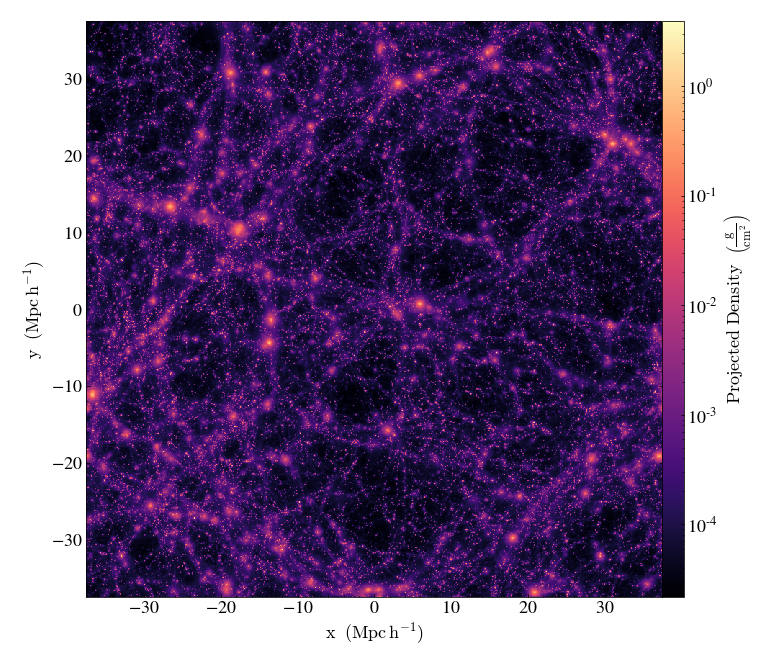

In [13]:
proj.set_cmap(field=("gas", "density"), cmap="magma")

In [14]:
from yt.units import kpc

yt : [INFO     ] 2021-09-02 15:03:58,918 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:03:58,932 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:03:58,938 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:03:58,940 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:03:58,972 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



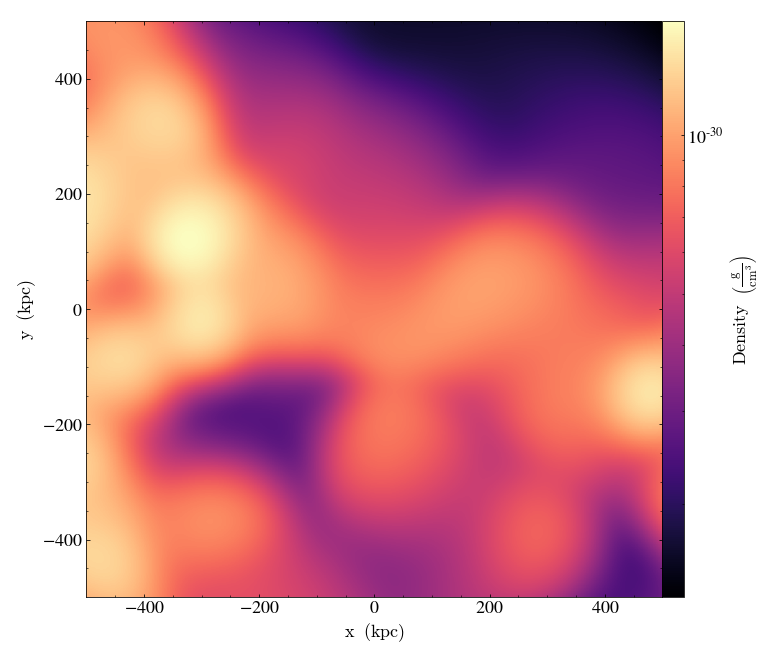

In [27]:
slc = yt.SlicePlot(ds,'z',('gas','density'),width=(75.0, "Mpc/h"))
slc.set_cmap(field=("gas", "density"), cmap="magma")
slc.set_width(1000*kpc)

**using center to change the center of the box**

yt : [INFO     ] 2021-09-02 15:08:50,190 xlim = -36499.994907 38499.994907
yt : [INFO     ] 2021-09-02 15:08:50,191 ylim = -35499.994907 39499.994907
yt : [INFO     ] 2021-09-02 15:08:50,192 xlim = -36499.994907 38499.994907
yt : [INFO     ] 2021-09-02 15:08:50,193 ylim = -35499.994907 39499.994907
yt : [INFO     ] 2021-09-02 15:08:50,194 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



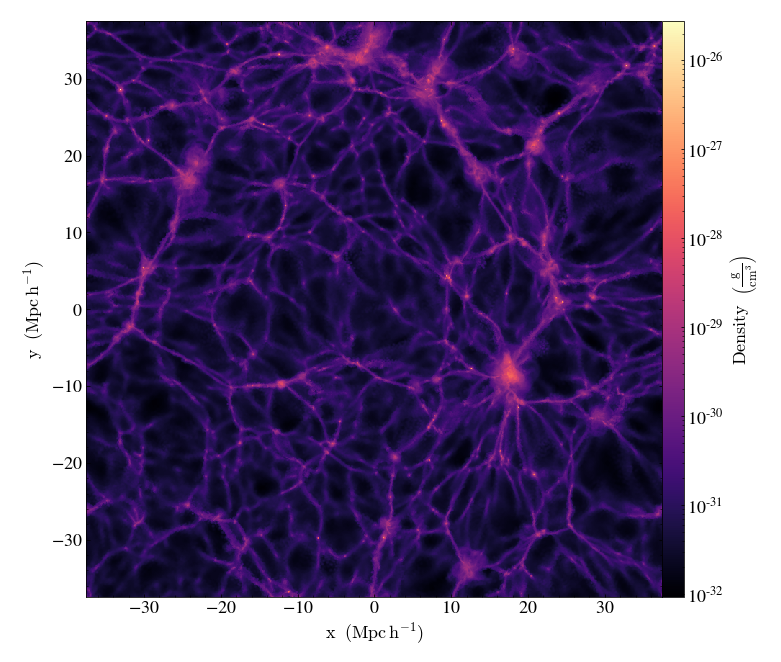

In [29]:
yt.SlicePlot(ds,'z',('gas','density'),width=(75.0, "Mpc/h"),center = [1000,2000,3000]).set_cmap(field=("gas", "density"), cmap="magma")

**Use `Trident` to make the mock spectra**

select a ray

In [34]:
ray_start = [37500,37500,0]
ray_end = [37500,37500,75000]

In [31]:
line_list = ['H','Si','Mg II','C II 1335']

In [35]:
ray = tri.make_simple_ray(ds,
start_position = ray_end,
end_position = ray_start,
lines = line_list,
ftype = "gas")

yt : [INFO     ] 2021-09-02 15:25:00,749 Getting segment at z = 2.220446049250313e-16: [0.5 0.5 1. ] unitary to [0.5 0.5 0. ] unitary.
yt : [INFO     ] 2021-09-02 15:25:00,752 Getting subsegment: [unyt_quantity(0.5, 'unitary'), unyt_quantity(0.5, 'unitary'), unyt_quantity(1., 'unitary')] to [unyt_quantity(0.5, 'unitary'), unyt_quantity(0.5, 'unitary'), unyt_quantity(0., 'unitary')].
yt : [INFO     ] 2021-09-02 15:26:24,892 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-09-02 15:26:24,968 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2021-09-02 15:26:24,968 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-09-02 15:26:24,969 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-09-02 15:26:24,970 Parameters: domain_right_edge         = [75000. 75000. 75000.] code_length
yt : [INFO     ] 2021-09-02 15:26:24,971 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-09-02 15:26:2

annotate the ray in the yt_plot figure

yt : [INFO     ] 2021-09-02 15:30:36,642 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:30:36,643 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:30:36,644 xlim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:30:36,645 ylim = 0.005093 74999.994907
yt : [INFO     ] 2021-09-02 15:30:36,654 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



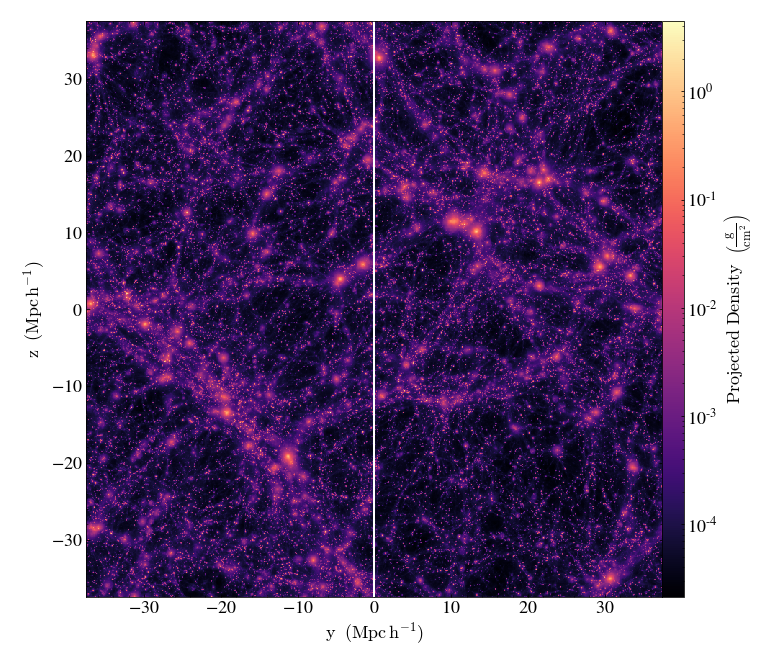

In [38]:
p = yt.ProjectionPlot(ds,'x','density',width=(75.0, "Mpc/h"))
p.set_cmap(field=("gas","density"), cmap="magma")
p.annotate_ray(ray)

/home/yanshulan/.local/lib/python3.6/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'density' is ambiguous and corresponds to any one of the following field types:
 {'gas'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/yanshulan/.local/lib/python3.6/site-packages/unyt/array.py:1779: RuntimeWarning: invalid value encountered in true_divide
  inp0.view(np.ndarray), inp1.view(np.ndarray), out=out_func, **kwargs
/home/yanshulan/.local/lib/python3.6/site-packages/unyt/array.py:1779: RuntimeWarning: invalid value encountered in less
  inp0.view(np.ndarray), inp1.view(np.ndarray), out=out_func, **kwargs



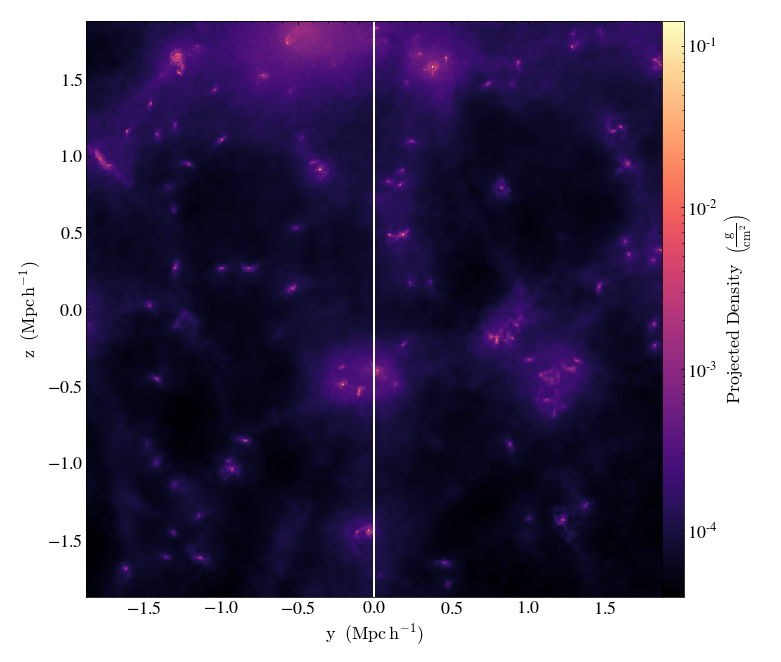

In [39]:
## zoom the figure
p.zoom(20)

use the `trident.SpectrumGenerator` to make spectrum

In [49]:
sg = tri.SpectrumGenerator('COS') # make the COS spectra
sg.make_spectrum(ray, lines = line_list)

yt : [INFO     ] 2021-09-02 15:39:07,145 Setting instrument to COS
/home/yanshulan/.local/lib/python3.6/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'H_p0_number_density' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'all'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("all", "H_p0_number_density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
yt : [INFO     ] 2021-09-02 15:39:07,171 Creating spectrum
/home/yanshulan/.local/lib/python3.6/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'redshift' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'all'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "redshift")'.
Deprecated since v4.0.0. This feature will be r

Adding line - Si II 1260 [1260.422000 A]: 100%|█████████▉| 1358/1359 [00:00<00:00, 23161.27it/s]
yt : [INFO     ] 2021-09-02 15:39:21,020 810 out of 1359 line components will be deposited as unresolved lines.
Adding line - Si II* 1194 [1194.500000 A]: 100%|█████████▉| 1358/1359 [00:00<00:00, 23088.97it/s]
yt : [INFO     ] 2021-09-02 15:39:21,147 811 out of 1359 line components will be deposited as unresolved lines.
Adding line - Si II 1190 [1190.416000 A]: 100%|█████████▉| 1358/1359 [00:00<00:00, 22714.77it/s]
yt : [INFO     ] 2021-09-02 15:39:21,275 838 out of 1359 line components will be deposited as unresolved lines.
Adding line - Si II 1021 [1020.699000 A]: 100%|█████████▉| 1358/1359 [00:00<00:00, 23095.15it/s]
yt : [INFO     ] 2021-09-02 15:39:21,401 842 out of 1359 line components will be deposited as unresolved lines.
Adding line - Si II 990 [989.873000 A]: 100%|█████████▉| 1358/1359 [00:00<00:00, 23633.41it/s]
yt : [INFO     ] 2021-09-02 15:39:21,537 808 out of 1359 line compon

In [50]:
sg.save_spectrum('test1.txt')

yt : [INFO     ] 2021-09-02 15:39:22,981 Writing spectrum to ascii file: test1.txt.


In [38]:
sg.plot_spectrum('test.png')

yt : [INFO     ] 2021-08-31 19:09:05,689 Writing spectrum plot to png file: test.png


In [51]:
spec_data = pd.read_table('test1.txt',sep = '\s+',comment = '#',header = None)

In [52]:
wave = spec_data[0]
flux = spec_data[2]

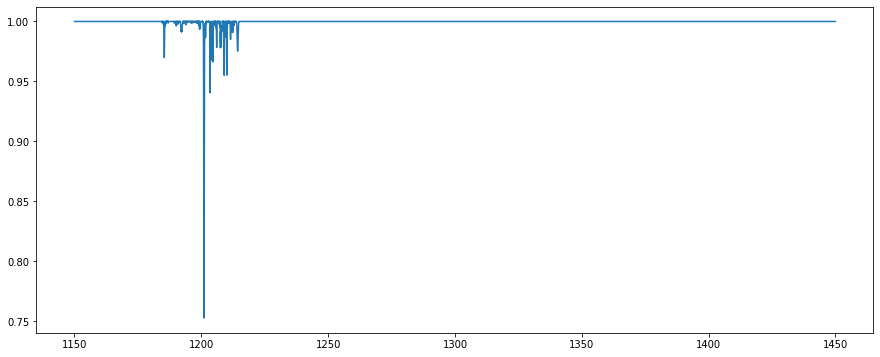

In [53]:
plt.figure(figsize = (15,6))
plt.plot(wave.values,flux.values)

(1184, 1216)

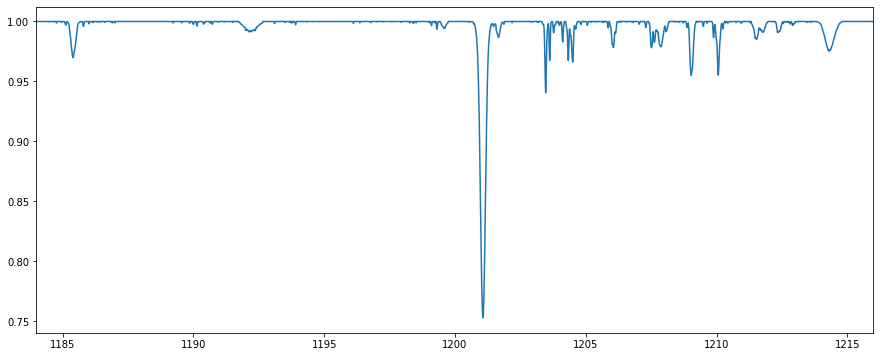

In [58]:
plt.figure(figsize = (15,6))
plt.plot(wave.values,flux.values)
plt.xlim(1184,1216)

In [59]:
sg.add_qso_spectrum()
sg.add_milky_way_foreground()
sg.apply_lsf()
sg.add_gaussian_noise(30)
sg.plot_spectrum('spec_final_1.png', step = True)

yt : [INFO     ] 2021-09-02 15:40:27,900 Applying default line spread function for COS.
yt : [INFO     ] 2021-09-02 15:40:27,917 Writing spectrum plot to png file: spec_final_1.png


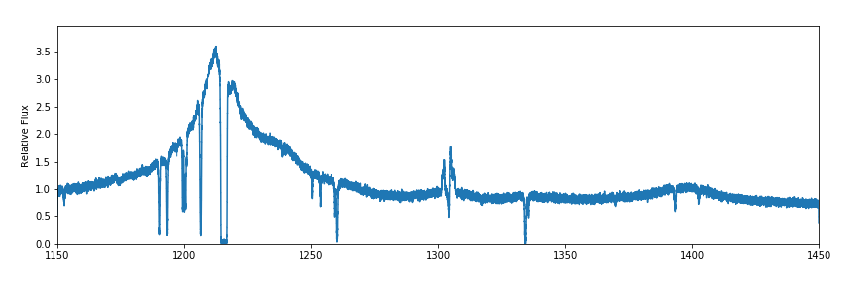

In [60]:
spec_png = mpimg.imread('spec_final_1.png')
plt.figure(figsize = (15,6))
plt.imshow(spec_png)
plt.axis('off')
plt.show()